## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn import tree
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import itertools
from imblearn.over_sampling import SMOTE
import graphviz
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Read Data

In [2]:
df = pd.read_csv('QualityPrediction.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Dimensions of the Data

In [3]:
df.shape

(1599, 12)

## Columns in the Data

In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## Information about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Statistical Summary on the data

In [6]:
df.describe(include = 'all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Checking for null values

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Correlation Heatmap

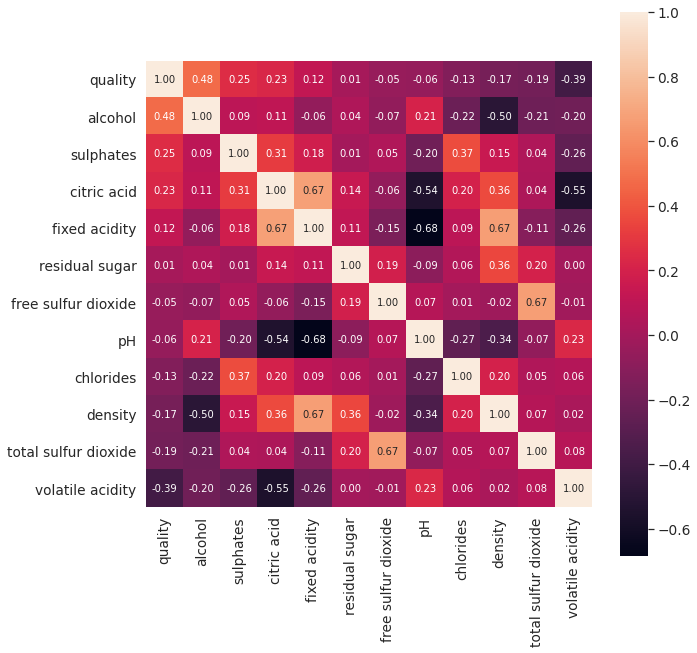

In [8]:
corrmat = df.corr()
plt.figure(figsize=(10,10))
k = 12 #number of variables for heatmap
cols = corrmat.nlargest(k, 'quality')['quality'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Removal of Duplicate Records

In [9]:
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [10]:
# Removal of duplicate Records
df.drop_duplicates(inplace = True)

In [11]:
# To cross check if there are any duplicate records present
df[df.duplicated()].sum()

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

## Distribution of classes of Quality Variable

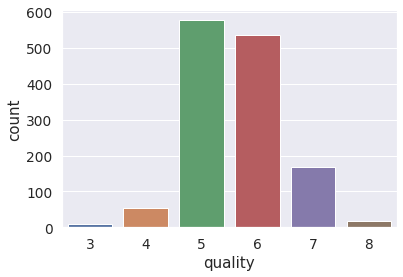

In [12]:
sns.countplot(df['quality'])

## Outliers detection for each feature with respect to target variable

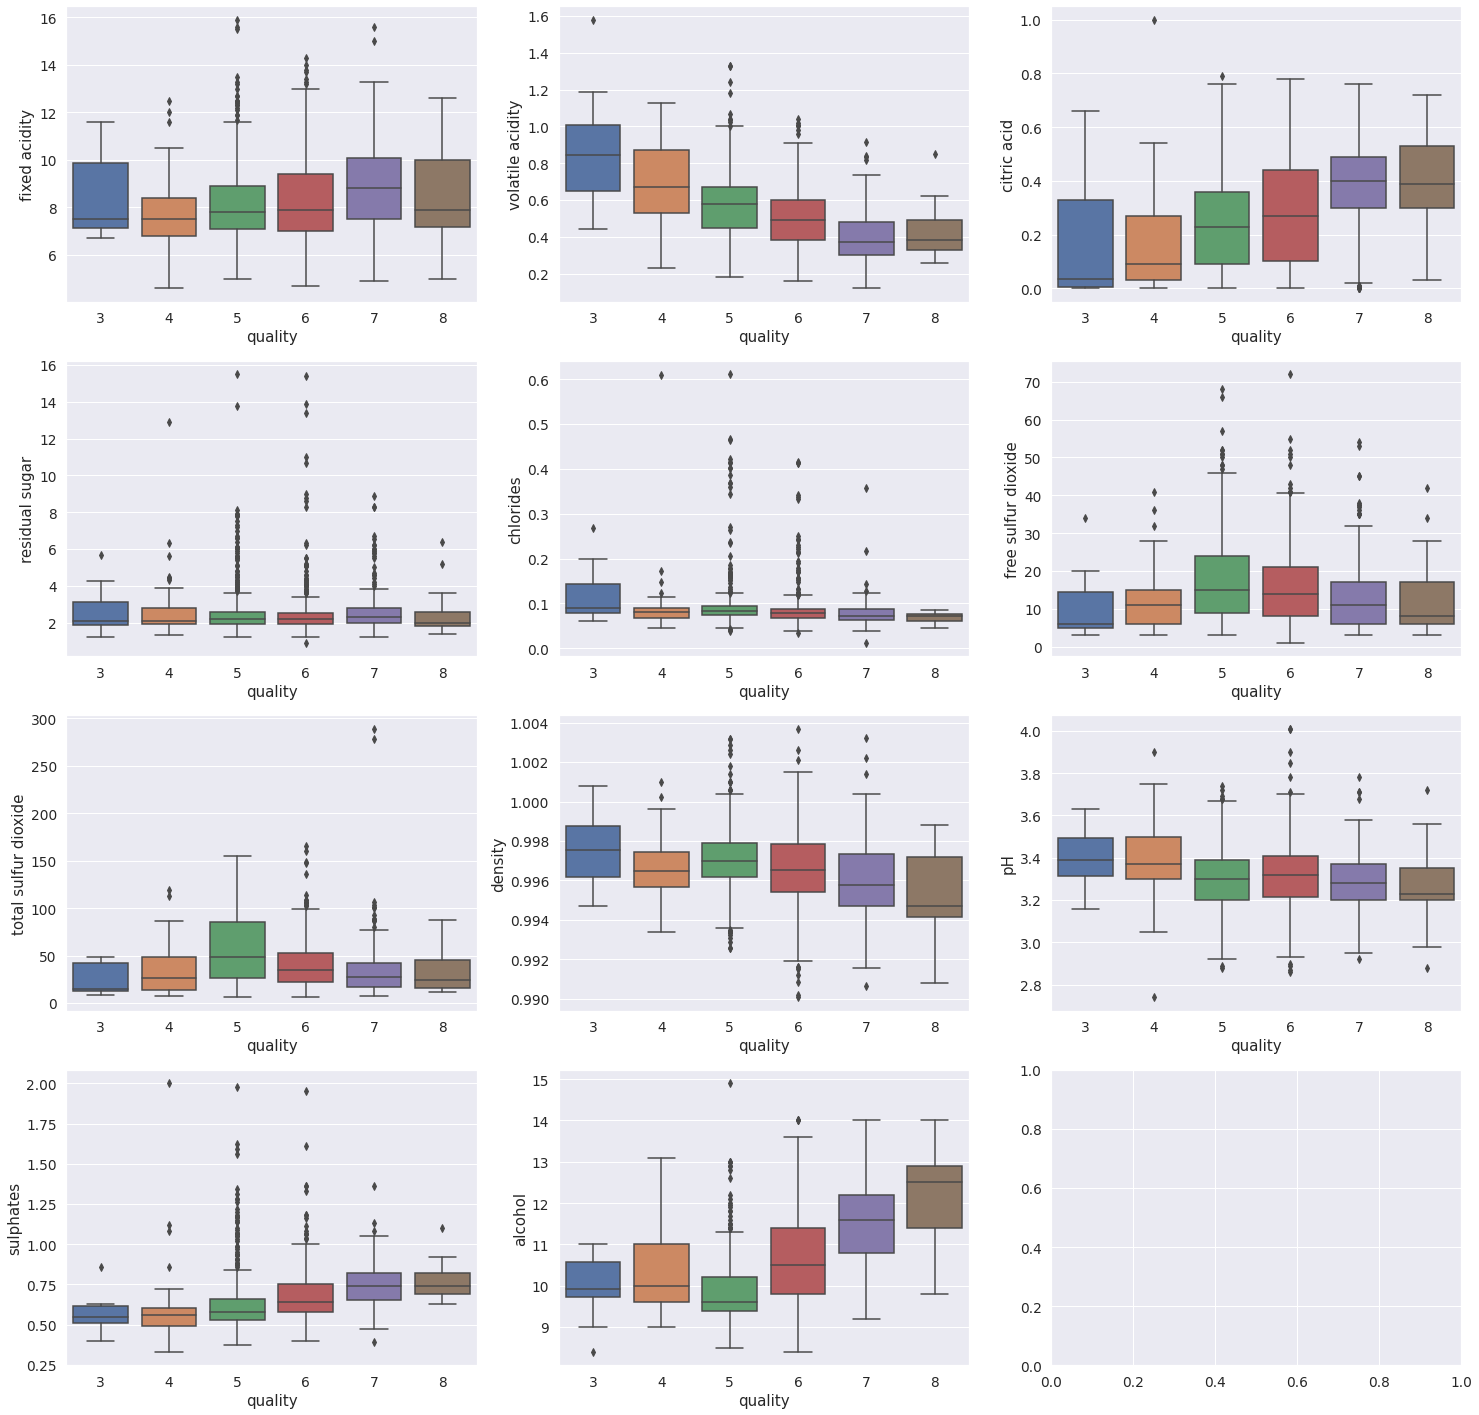

In [13]:
#Check the outliers for each feature with respect to output value
fig, ax1 = plt.subplots(4,3, figsize=(25,25))
k = 0
for i in range(4):
    for j in range(3):
        if k !=11:
            sns.boxplot(x = 'quality',y = df.iloc[:,k], data = df, ax = ax1[i][j])
            k += 1
plt.show()

## Visualization plots to visualize relation between response and target variables

### Quality vs Fixed Acidity Plot

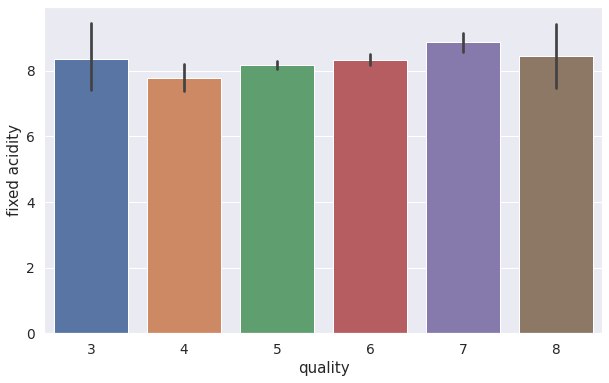

In [14]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

### Quality vs Volatile Acidity Plot

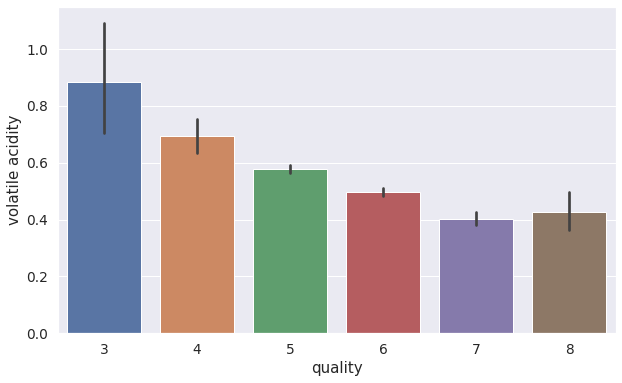

In [15]:
#Here we see that volatile acidity decreases as we go higher in quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

### Quality vs Citric Acid Plot

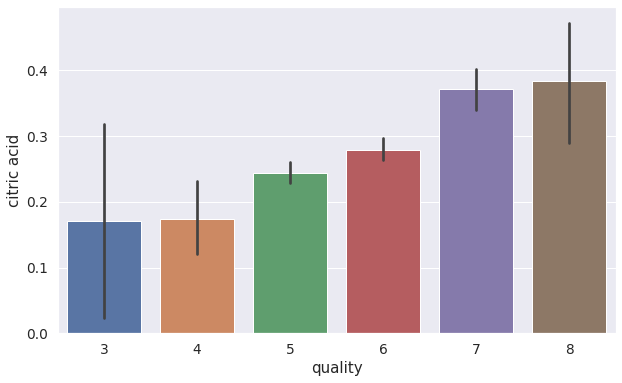

In [16]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

### Quality vs Residual Sugar Plot

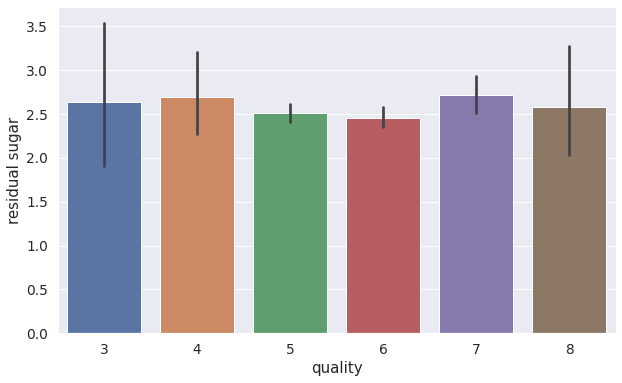

In [17]:
#Here we see that residual sugar does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

### Quality vs Chlorides Plot

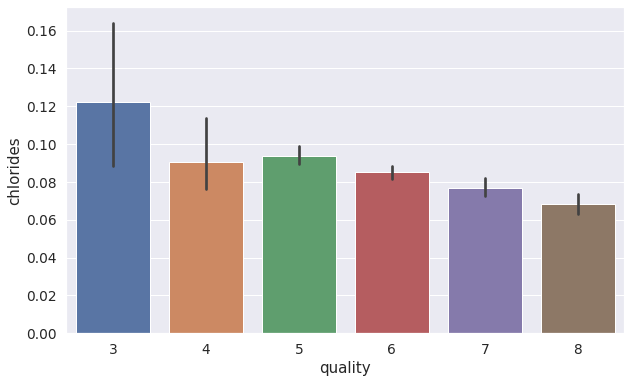

In [18]:
#Composition of chloride also goes down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

### Quality vs Free Sulfur Dioxide plot

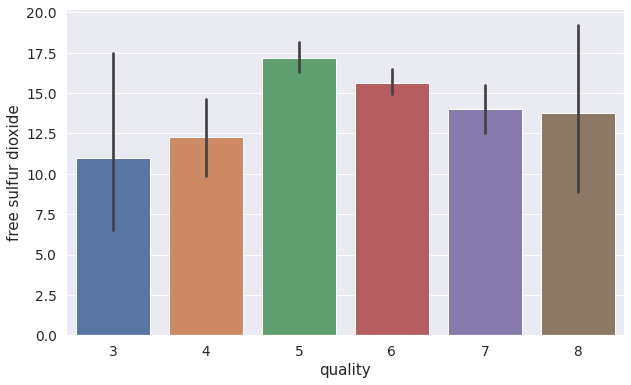

In [19]:
#Here we see that free sulfur dioxide does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

### Quality vs Total Sulfur Dioxide plot

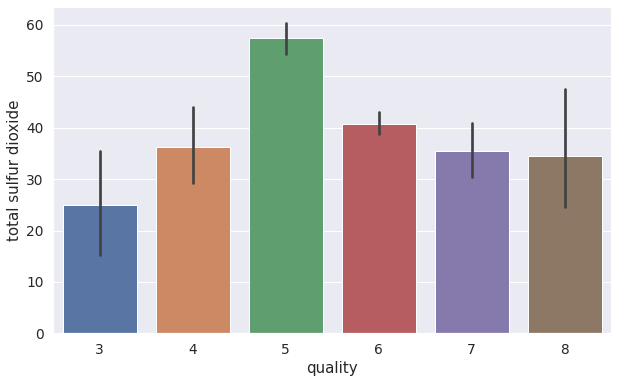

In [20]:
#Here we see that total sulfur dioxide does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

### Quality vs Sulphates plot

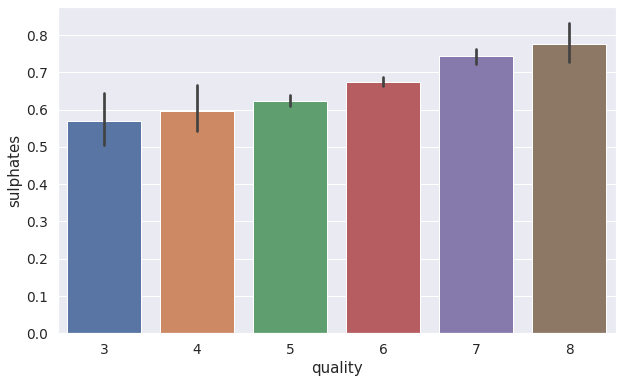

In [21]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

### Quality vs Alcohol plot

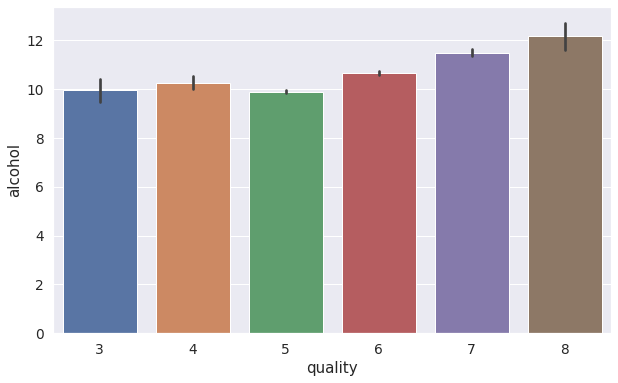

In [22]:
#Alcohol level also goes higher as the quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

### Quality vs Density plot

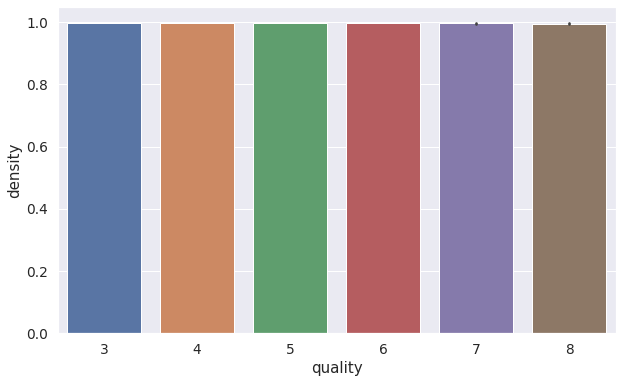

In [23]:
#Here we see that density does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'density', data = df)

### Quality vs pH plot

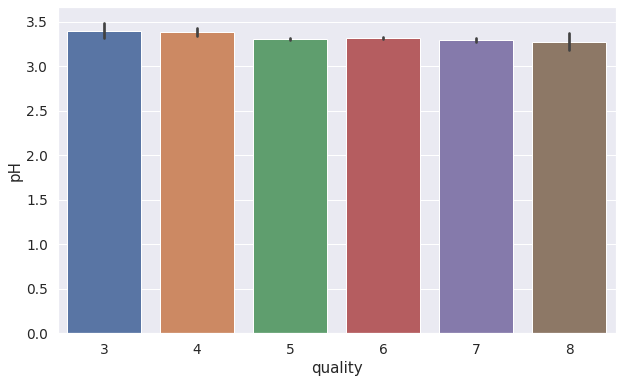

In [24]:
#Here we see that pH does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'pH', data = df)

## Removal of Outliers

In [25]:
# Function to detect outliers using IQR method
def outlier_detect(arr):
    Q1, Q3 = np.percentile(arr, [25,75])
    IQR = Q3-Q1
    l_b = Q1 - (IQR * 1.5)
    u_b = Q3 + (IQR * 1.5)
    outlier = [i for i in arr if (i > u_b) or (i < l_b)]

    return outlier

In [26]:
outl_fix_acid = outlier_detect(np.array(df['fixed acidity']))
outl_fix_acid.sort()
print(outl_fix_acid)

[12.4, 12.4, 12.4, 12.4, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.6, 12.6, 12.6, 12.6, 12.7, 12.7, 12.7, 12.8, 12.8, 12.8, 12.9, 12.9, 13.0, 13.0, 13.2, 13.2, 13.3, 13.3, 13.3, 13.4, 13.5, 13.7, 13.8, 14.0, 14.3, 15.0, 15.5, 15.6, 15.6, 15.9]


In [27]:
df.drop(df[df['fixed acidity']>=12.4].index,axis=0,inplace=True)

In [28]:
outl_resd_sug = outlier_detect(np.array(df['residual sugar']))
outl_resd_sug.sort()
print(outl_resd_sug)

[3.7, 3.7, 3.7, 3.75, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.1, 4.1, 4.1, 4.1, 4.1, 4.1, 4.2, 4.2, 4.25, 4.3, 4.3, 4.3, 4.3, 4.4, 4.4, 4.4, 4.4, 4.5, 4.5, 4.6, 4.6, 4.6, 4.6, 4.65, 4.7, 4.8, 4.8, 5.0, 5.1, 5.1, 5.1, 5.1, 5.15, 5.2, 5.2, 5.2, 5.4, 5.5, 5.5, 5.5, 5.5, 5.5, 5.6, 5.6, 5.6, 5.6, 5.7, 5.8, 5.9, 5.9, 6.0, 6.0, 6.0, 6.1, 6.1, 6.1, 6.2, 6.2, 6.2, 6.3, 6.3, 6.4, 6.4, 6.55, 6.6, 6.6, 6.7, 6.7, 7.0, 7.2, 7.3, 7.8, 7.8, 7.9, 7.9, 8.1, 8.3, 8.3, 8.3, 8.6, 8.8, 8.9, 9.0, 10.7, 11.0, 12.9, 13.4, 13.8, 13.9, 15.4, 15.5]


In [29]:
df.drop(df[df['residual sugar']>=3.7].index,axis=0,inplace=True)

## Checking the variation for different classification for the target variable

In [30]:
df['quality'].value_counts()

5    516
6    483
7    139
4     44
8     14
3      8
Name: quality, dtype: int64

## Declaring the response and predictor variables

In [31]:
X = df.drop('quality',axis=1).values
Y = df['quality'].values

# Model Building

## Splitting of data into train & test Split

In [32]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state = 10)

## Standardizing the predictor variables

In [33]:
standard_Scaler=StandardScaler()
X_train = standard_Scaler.fit_transform(x_train)
X_test = standard_Scaler.transform(x_test)

## Decision Tree Classifier

In [34]:
model_dt = DecisionTreeClassifier(criterion = 'gini',random_state=10)

model_dt.fit(X_train,y_train)

y_pred_dt = model_dt.predict(X_test)
acc_dt_bf = accuracy_score(y_test,y_pred_dt)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.14      0.11      0.12         9
           5       0.53      0.55      0.54       100
           6       0.40      0.43      0.42        92
           7       0.43      0.32      0.36        38
           8       0.00      0.00      0.00         2

    accuracy                           0.45       241
   macro avg       0.25      0.24      0.24       241
weighted avg       0.45      0.45      0.45       241



### Accuracy Score for Decision Tree

In [35]:
print("Training accuracy :", model_dt.score(X_train, y_train))
print("Testing accuracy :", model_dt.score(X_test, y_test))
print("Accuracy: ",accuracy_score(y_test,y_pred_dt))

Training accuracy : 1.0
Testing accuracy : 0.44813278008298757
Accuracy:  0.44813278008298757


### Confusion Matrix: Decision Tree

[]

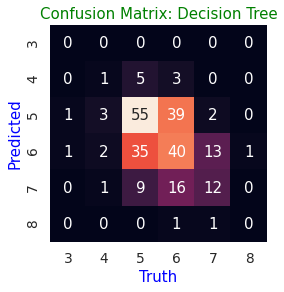

In [36]:
mat_dt = confusion_matrix(y_test,y_pred_dt)
names = np.unique(df['quality'])
sns.heatmap(mat_dt, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth',color = 'blue')
plt.ylabel('Predicted',color = 'blue')
plt.title('Confusion Matrix: Decision Tree',color = 'green')
plt.plot()

## Random Forest Classifier

In [37]:
model_rf = RandomForestClassifier(n_estimators= 100,random_state=10)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
acc_rf_bf = accuracy_score(y_test,y_pred_rf)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.65      0.75      0.69       100
           6       0.54      0.65      0.59        92
           7       0.64      0.24      0.35        38
           8       0.00      0.00      0.00         2

    accuracy                           0.60       241
   macro avg       0.37      0.33      0.33       241
weighted avg       0.58      0.60      0.57       241



### Confusion Matrix: Random Forest

[]

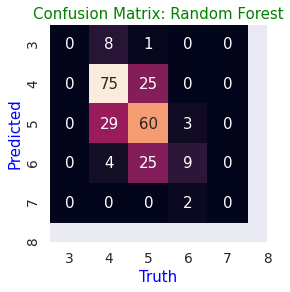

In [38]:
mat_rf = confusion_matrix(y_test,y_pred_rf)
names = np.unique(df['quality'])
sns.heatmap(mat_rf, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth',color = 'blue')
plt.ylabel('Predicted',color = 'blue')
plt.title('Confusion Matrix: Random Forest',color = 'green')
plt.plot()

### Accuracy Score for Random Forest

In [39]:
print("Training accuracy :", model_rf.score(X_train, y_train))
print("Testing accuracy :", model_rf.score(X_test, y_test))
print("Accuracy: ",accuracy_score(y_test,y_pred_rf))

Training accuracy : 1.0
Testing accuracy : 0.5975103734439834
Accuracy:  0.5975103734439834


## Hyperparameter Tuning of Random Forest using GridSearchCV

In [40]:
fit_rf = RandomForestClassifier(random_state=10)
param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy'],
              'n_estimators': [100,200,300]}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 100}


### Accuracy Post Tuning: Random Forest

In [83]:
model_rf_tun = RandomForestClassifier(bootstrap = False,criterion = 'gini',max_depth = 4,max_features = 'auto',n_estimators= 100,random_state=10)
model_rf_tun.fit(X_train, y_train)
y_pred_rf_tun = model_rf_tun.predict(X_test)
print("Accuracy: ",accuracy_score(y_test, y_pred_rf_tun))

Accuracy:  0.5601659751037344


## Logistic Regression for multi-class classification

In [42]:
log_reg = LogisticRegression(multi_class='ovr',random_state = 10)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
acc_lg_bf = accuracy_score(y_test,log_reg_pred)
print(classification_report(y_test, log_reg_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.61      0.75      0.68       100
           6       0.45      0.55      0.50        92
           7       0.40      0.05      0.09        38
           8       0.00      0.00      0.00         2

    accuracy                           0.53       241
   macro avg       0.29      0.27      0.25       241
weighted avg       0.49      0.53      0.48       241



### Confusion Matrix: Logistic Regression

[]

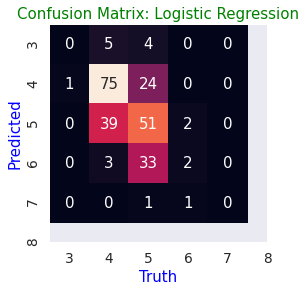

In [43]:
mat_lr = confusion_matrix(y_test,log_reg_pred)
names = np.unique(df['quality'])
sns.heatmap(mat_lr, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth',color = 'blue')
plt.ylabel('Predicted',color = 'blue')
plt.title('Confusion Matrix: Logistic Regression',color = 'green')
plt.plot()

### Accuracy Score for Logistic Regression

In [44]:
print("Training accuracy :", log_reg.score(X_train, y_train))
print("Testing accuracy :", log_reg.score(X_test, y_test))
print("Accuracy: ",accuracy_score(y_test,log_reg_pred))

Training accuracy : 0.6074766355140186
Testing accuracy : 0.5311203319502075
Accuracy:  0.5311203319502075


## Naive Bayes

In [45]:
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_predict = nb.predict(X_test)
acc_nb_bf = accuracy_score(y_test,nb_predict)
print(classification_report(y_test, nb_predict))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.33      0.56      0.42         9
           5       0.62      0.70      0.66       100
           6       0.51      0.39      0.44        92
           7       0.53      0.47      0.50        38
           8       0.14      0.50      0.22         2

    accuracy                           0.54       241
   macro avg       0.36      0.44      0.37       241
weighted avg       0.55      0.54      0.54       241



### Confusion Matrix:Naive Bayes

[]

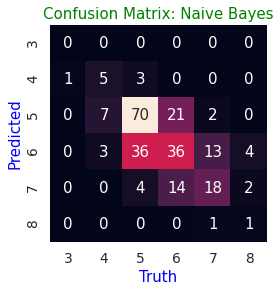

In [46]:
mat_nb = confusion_matrix(y_test,nb_predict)
names = np.unique(df['quality'])
sns.heatmap(mat_nb, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth',color = 'blue')
plt.ylabel('Predicted',color = 'blue')
plt.title('Confusion Matrix: Naive Bayes',color = 'green')
plt.plot()

### Accuracy for Naive Bayes

In [47]:
print("Training accuracy :", nb.score(X_train, y_train))
print("Testing accuracy :", nb.score(X_test, y_test))
print("Accuracy: ",accuracy_score(y_test,nb_predict))

Training accuracy : 0.569055036344756
Testing accuracy : 0.5394190871369294
Accuracy:  0.5394190871369294


## SVM Classifier

### linear kernel

In [48]:
svc_l = SVC(kernel='linear',random_state = 10)
svc_l.fit(X_train,y_train)
y_pred_svc_l = svc_l.predict(X_test)

#### Accuracy score: Linear Kernel

In [49]:
print("Training accuracy :", svc_l.score(X_train, y_train))
print("Testing accuracy :", svc_l.score(X_test, y_test))
print("Accuracy: ",accuracy_score(y_test,y_pred_svc_l))

Training accuracy : 0.6053997923156802
Testing accuracy : 0.5394190871369294
Accuracy:  0.5394190871369294


### polynomial kernel

In [50]:
svc_p = SVC(kernel='poly',random_state = 10)
svc_p.fit(X_train,y_train)
y_pred_svc_p = svc_p.predict(X_test)
acc_svm_bf = accuracy_score(y_test,y_pred_svc_p)

#### Accuracy Score: Polynomial Kernel

In [51]:
print("Training accuracy :", svc_p.score(X_train, y_train))
print("Testing accuracy :", svc_p.score(X_test, y_test))
print("Accuracy: ",accuracy_score(y_test,y_pred_svc_p))

Training accuracy : 0.6863966770508827
Testing accuracy : 0.5560165975103735
Accuracy:  0.5560165975103735


### RBF kernel

In [52]:
svc_r = SVC(kernel='rbf',random_state = 10)
svc_r.fit(X_train,y_train)
y_pred_svc_r = svc_r.predict(X_test)

#### Accuracy Score: RBF Kernel

In [53]:
print("Training accuracy :", svc_r.score(X_train, y_train))
print("Testing accuracy :", svc_r.score(X_test, y_test))
print("Accuracy: ",accuracy_score(y_test,y_pred_svc_r))

Training accuracy : 0.6739356178608515
Testing accuracy : 0.5767634854771784
Accuracy:  0.5767634854771784


### Confusion Matrix: SVM

[]

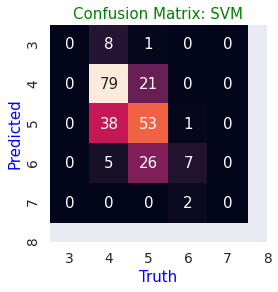

In [54]:
mat_svm = confusion_matrix(y_test,y_pred_svc_r)
names = np.unique(df['quality'])
sns.heatmap(mat_svm, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth',color = 'blue')
plt.ylabel('Predicted',color = 'blue')
plt.title('Confusion Matrix: SVM',color = 'green')
plt.plot()

## Hyperparameter Tuning of SVM using GridSearchCV

In [55]:
svc_r = SVC(random_state = 10)
tuned_parameter = {
    'C':(np.arange(0.01,1,0.02)),'kernel':['linear','rbf','poly'],'gamma':[0.01,0.02,0.03,0.04,0.05],
     'degree':[2,3,4,5]
}

model_svm = GridSearchCV(svc_r,tuned_parameter,cv=10,scoring='accuracy',n_jobs = 3)
model_svm.fit(X_train,y_train)
print(model_svm.best_score_)
print(model_svm.best_params_)

0.6034471649484536
{'C': 0.8299999999999998, 'degree': 2, 'gamma': 0.04, 'kernel': 'rbf'}


### Accuracy Post Tuning: SVM

In [56]:
svc_tun = SVC(C = 0.8299999999999998, degree = 2, gamma = 0.04,kernel='rbf',random_state = 10)
svc_tun.fit(X_train,y_train)
y_pred_svc_tun = svc_tun.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_svc_tun))

Accuracy:  0.5394190871369294


## KNN

In [57]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.58      0.72      0.64       100
           6       0.50      0.50      0.50        92
           7       0.57      0.34      0.43        38
           8       0.00      0.00      0.00         2

    accuracy                           0.54       241
   macro avg       0.33      0.31      0.31       241
weighted avg       0.52      0.54      0.52       241



### Confusion Matrix: KNN

[]

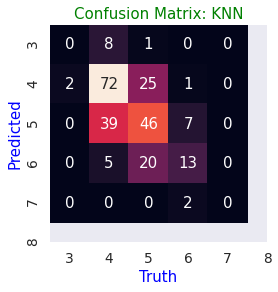

In [58]:
mat = confusion_matrix(y_test,pred_knn)
names = np.unique(df['quality'])
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth',color = 'blue')
plt.ylabel('Predicted',color = 'blue')
plt.title('Confusion Matrix: KNN',color = 'green')
plt.plot()

### Accuracy Score: KNN

In [59]:
print("Training accuracy :", knn.score(X_train, y_train))
print("Testing accuracy :", knn.score(X_test, y_test))
print("Accuracy: ",accuracy_score(y_test,pred_knn))

Training accuracy : 0.7009345794392523
Testing accuracy : 0.5435684647302904
Accuracy:  0.5435684647302904


## Hyperparameter Tuning of KNN using GridSearchCV

In [60]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object1
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 20


### Accuracy post tuning: KNN

In [61]:
knn_tune = KNeighborsClassifier(n_neighbors = 20,leaf_size = 1, p = 2)
knn_tune.fit(X_train,y_train)
pred_knn_t = knn_tune.predict(X_test)
acc_knn_bf = accuracy_score(y_test,pred_knn_t)
print("Accuracy: ",accuracy_score(y_test,pred_knn_t))

Accuracy:  0.5435684647302904


## Using AdaBoost

In [62]:
mod_ada = AdaBoostClassifier(random_state=10)
mod_ada.fit(X_train, y_train)
y_pred_ada = mod_ada.predict(X_test)
acc_ada = accuracy_score(y_test,y_pred_ada)
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.50      0.22      0.31         9
           5       0.62      0.73      0.67       100
           6       0.48      0.61      0.54        92
           7       0.00      0.00      0.00        38
           8       0.00      0.00      0.00         2

    accuracy                           0.54       241
   macro avg       0.27      0.26      0.25       241
weighted avg       0.46      0.54      0.50       241



### Accuracy Score: AdaBoost

In [63]:
print("Training accuracy :", mod_ada.score(X_train, y_train))
print("Testing accuracy :", mod_ada.score(X_test, y_test))
print("Accuracy: ",accuracy_score(y_test,y_pred_ada))

Training accuracy : 0.5846313603322949
Testing accuracy : 0.5435684647302904
Accuracy:  0.5435684647302904


## Using Gradient Boosting

In [64]:
mod_grad = GradientBoostingClassifier(random_state=10)
mod_grad.fit(X_train, y_train)
y_pred_grad = mod_grad.predict(X_test)
acc_grad = accuracy_score(y_test,y_pred_grad)
print(classification_report(y_test,y_pred_grad))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         9
           5       0.62      0.75      0.68       100
           6       0.52      0.55      0.54        92
           7       0.58      0.29      0.39        38
           8       0.00      0.00      0.00         2

    accuracy                           0.57       241
   macro avg       0.29      0.27      0.27       241
weighted avg       0.55      0.57      0.55       241



### Accuracy Score: Gradient Boosting

In [65]:
print("Training accuracy :", mod_grad.score(X_train, y_train))
print("Testing accuracy :", mod_grad.score(X_test, y_test))
print("Accuracy: ",accuracy_score(y_test,y_pred_grad))

Training accuracy : 0.9148494288681205
Testing accuracy : 0.5684647302904564
Accuracy:  0.5684647302904564


## Resampling the imbalanced data

In [66]:
over = RandomOverSampler(sampling_strategy = {3:500,4:500,7:500,8:500},random_state = 10)
under = RandomUnderSampler(random_state = 10)
# first performing oversampling to minority class
X_over, y_over = over.fit_resample(X_train, y_train)
print(f"Oversampled: {Counter(y_over)}")

# now to combine under sampling 
X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")

Oversampled: Counter({4: 500, 7: 500, 8: 500, 3: 500, 5: 416, 6: 391})
Combined Random Sampling: Counter({3: 391, 4: 391, 5: 391, 6: 391, 7: 391, 8: 391})


## Decision Tree Classifier after resampling

In [67]:
model_dt_rs = DecisionTreeClassifier(criterion = 'gini',random_state=10)

model_dt_rs.fit(X_combined_sampling,y_combined_sampling)

y_pred_dt_rs = model_dt_rs.predict(X_test)
acc_dt_af = accuracy_score(y_test,y_pred_dt_rs)
print(classification_report(y_test, y_pred_dt_rs))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.18      0.22      0.20         9
           5       0.63      0.64      0.64       100
           6       0.50      0.51      0.51        92
           7       0.46      0.34      0.39        38
           8       0.00      0.00      0.00         2

    accuracy                           0.52       241
   macro avg       0.30      0.29      0.29       241
weighted avg       0.53      0.52      0.53       241



## Random Forest classifier after resampling

In [68]:
model_rf_s = RandomForestClassifier(n_estimators= 100,random_state=10)
model_rf_s.fit(X_combined_sampling, y_combined_sampling)
y_pred_rf_s = model_rf_s.predict(X_test)
acc_rf_af = accuracy_score(y_test,y_pred_rf_s)
print(classification_report(y_test, y_pred_rf_s))

              precision    recall  f1-score   support

           4       0.33      0.11      0.17         9
           5       0.64      0.76      0.70       100
           6       0.54      0.58      0.56        92
           7       0.59      0.34      0.43        38
           8       0.00      0.00      0.00         2

    accuracy                           0.59       241
   macro avg       0.42      0.36      0.37       241
weighted avg       0.58      0.59      0.58       241



### Accuracy Score: Decision Tree after resampling

In [69]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred_dt_rs))

Accuracy Score:  0.5228215767634855


## Logistic Regression after resampling

In [70]:
log_reg_rs = LogisticRegression(multi_class='ovr',random_state = 10)
log_reg_rs.fit(X_combined_sampling,y_combined_sampling)
log_reg_pred_rs = log_reg_rs.predict(X_test)
acc_lg_af = accuracy_score(y_test,log_reg_pred_rs)
print(classification_report(y_test, log_reg_pred_rs))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.10      0.33      0.15         9
           5       0.61      0.54      0.57       100
           6       0.61      0.24      0.34        92
           7       0.46      0.45      0.45        38
           8       0.07      1.00      0.13         2

    accuracy                           0.41       241
   macro avg       0.31      0.43      0.27       241
weighted avg       0.56      0.41      0.45       241



### Accuracy Score: Logistic Regression after resampling

In [71]:
print("Accuracy: ",accuracy_score(y_test,log_reg_pred_rs))

Accuracy:  0.4066390041493776


## Naive Bayes after resampling

In [72]:
nb_rs = GaussianNB()
nb_rs.fit(X_combined_sampling,y_combined_sampling)
nb_predict_rs = nb_rs.predict(X_test)
acc_nb_af = accuracy_score(y_test,nb_predict_rs)
print(classification_report(y_test, nb_predict_rs))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.08      0.67      0.14         9
           5       0.62      0.39      0.48       100
           6       0.50      0.12      0.19        92
           7       0.27      0.21      0.24        38
           8       0.03      0.50      0.05         2

    accuracy                           0.27       241
   macro avg       0.25      0.31      0.18       241
weighted avg       0.49      0.27      0.31       241



### Accuracy Score: Naive Bayes after resampling

In [73]:
print("Accuracy Score: ",accuracy_score(y_test,nb_predict_rs))

Accuracy Score:  0.2697095435684647


## SVM after resampling

In [74]:
svc_rs = SVC(kernel='rbf',random_state = 10)
svc_rs.fit(X_combined_sampling,y_combined_sampling)
y_pred_svc_rs = svc_rs.predict(X_test)
acc_svm_af = accuracy_score(y_test,y_pred_svc_rs)
print(classification_report(y_test,y_pred_svc_rs))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.13      0.33      0.19         9
           5       0.66      0.67      0.66       100
           6       0.60      0.42      0.50        92
           7       0.53      0.55      0.54        38
           8       0.00      0.00      0.00         2

    accuracy                           0.54       241
   macro avg       0.32      0.33      0.31       241
weighted avg       0.59      0.54      0.56       241



### Accuracy: SVM after resampling

In [75]:
print("Accuracy: ",accuracy_score(y_test,y_pred_svc_rs))

Accuracy:  0.5394190871369294


## KNN after resampling

In [76]:
knn_rs = KNeighborsClassifier()
knn_rs.fit(X_combined_sampling,y_combined_sampling)
pred_knn_rs = knn_rs.predict(X_test)
acc_knn_af = accuracy_score(y_test,pred_knn_rs)
print(classification_report(y_test,pred_knn_rs))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.05      0.11      0.07         9
           5       0.70      0.62      0.66       100
           6       0.55      0.38      0.45        92
           7       0.41      0.58      0.48        38
           8       0.00      0.00      0.00         2

    accuracy                           0.50       241
   macro avg       0.28      0.28      0.27       241
weighted avg       0.56      0.50      0.52       241



### Accuracy Score: KNN after resampling

In [77]:
print("Accuracy: ",accuracy_score(y_test,pred_knn_rs))

Accuracy:  0.4979253112033195


## Comparison of Different Models based on Accuracy

### Boosting Algorithms

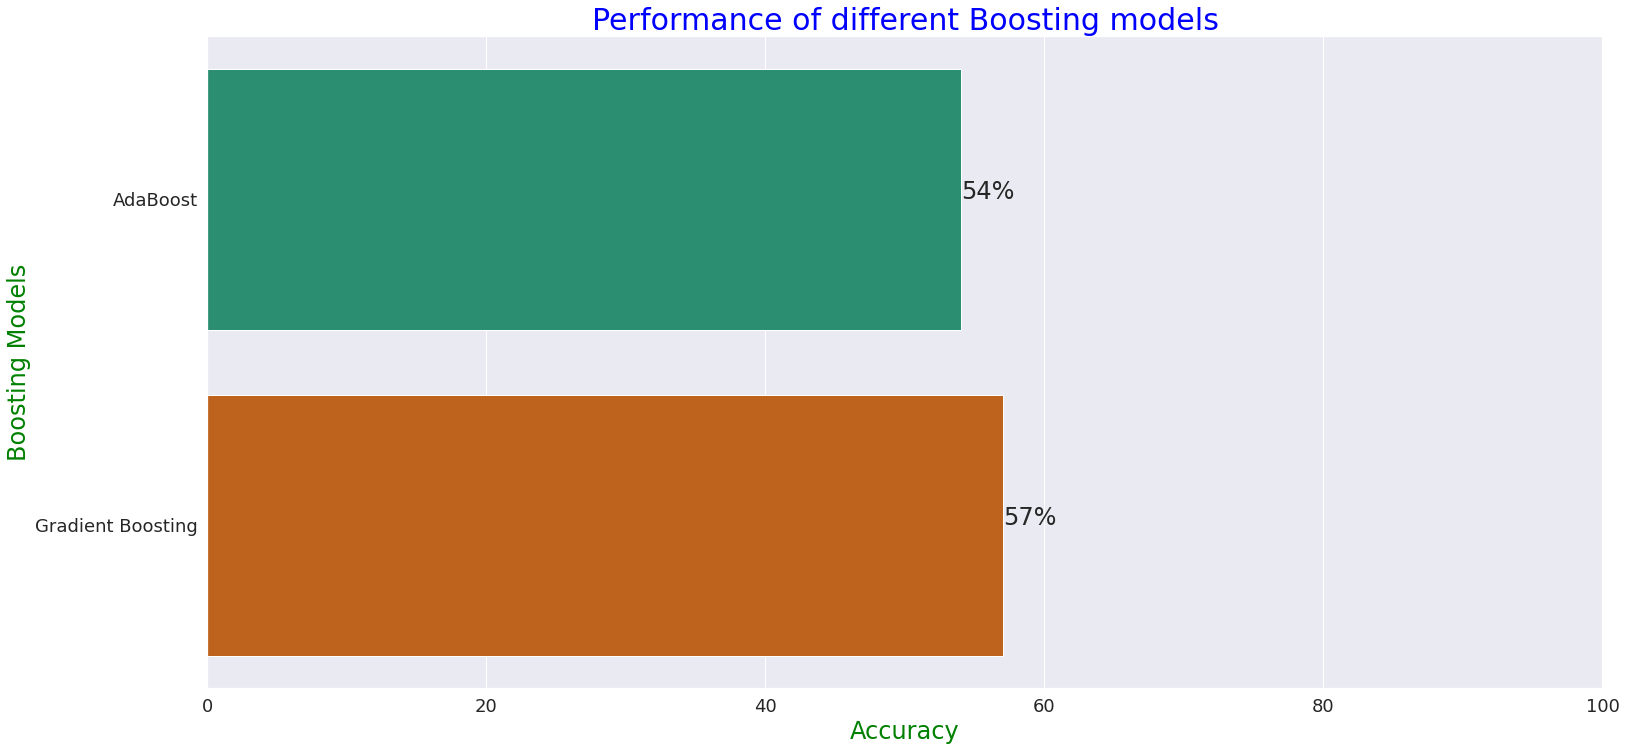

In [78]:
d_ml_b = ['AdaBoost','Gradient Boosting']

d_val_b = [round(acc_ada,2)*100,round(acc_grad,2)*100]

ser_md_b = pd.Series(d_ml_b,name = 'Models')
ser_v_b = pd.Series(d_val_b,name = 'Accuracy')
df_d_b = pd.merge(ser_md_b,ser_v_b,right_index = True, 
               left_index = True)

fig, ax= plt.subplots(figsize =(25,12))
sns.set_style('darkgrid')
sns.set_context('notebook')
sns.set(font_scale=2)
# plt.fontsize =(35)

ax=sns.barplot(palette="Dark2",ax=ax,
            x='Accuracy', y='Models',data=df_d_b)
total = 100
for p in ax.patches:
    percentage ='{:.0f}%'.format(100 * p.get_width()/total)
    width, height = p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlim(left = 0, right = 100)
plt.title('Performance of different Boosting models',
         fontsize = 30,color = 'blue')
plt.xlabel ('Accuracy',fontsize = 24,color = 'green')
plt.ylabel ('Boosting Models',fontsize = 24,color = 'green')
plt.show ()

### Before Resampling

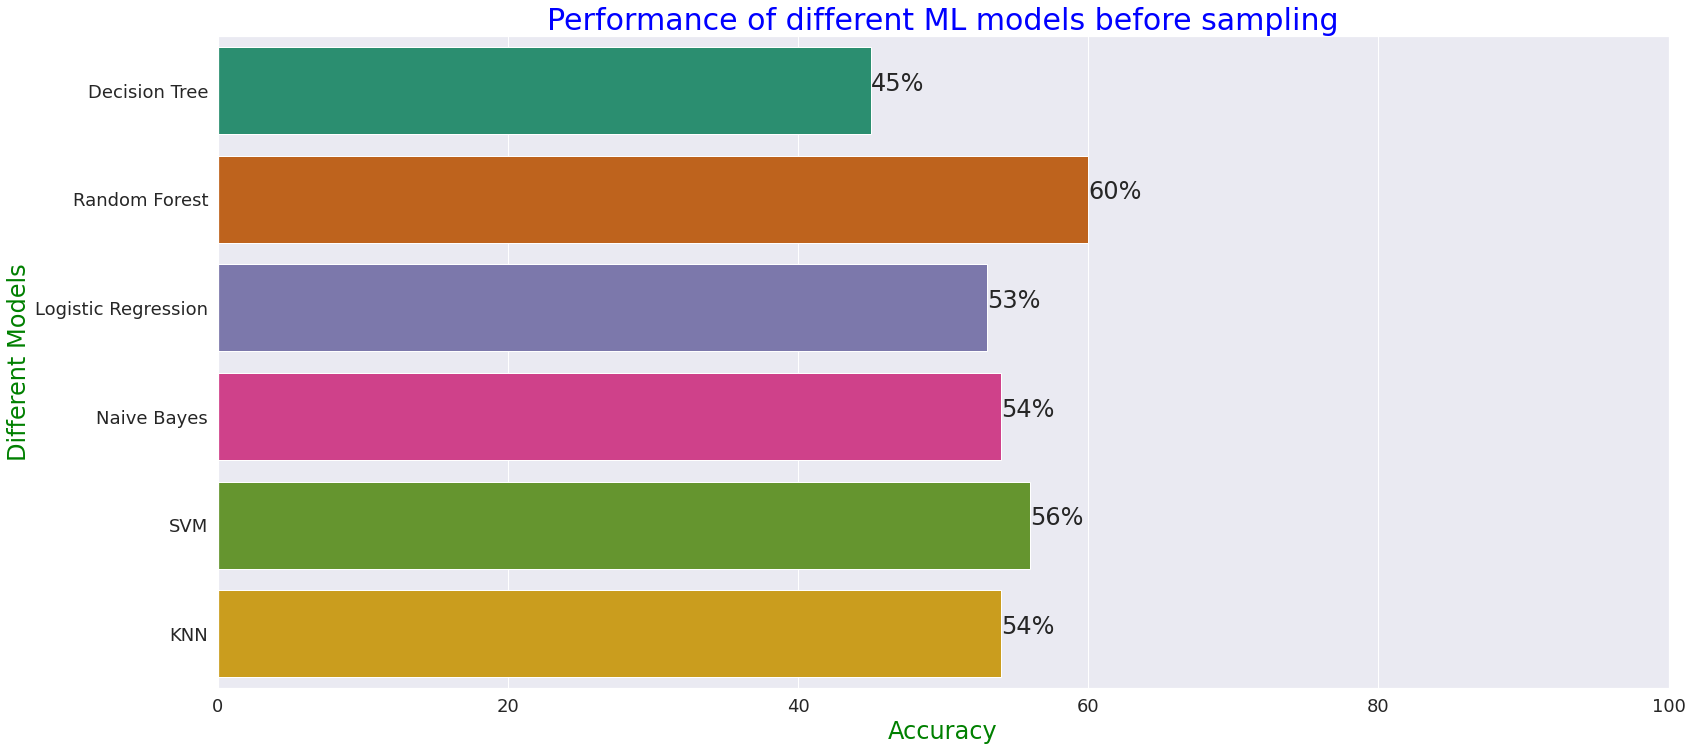

In [79]:
d_ml = ['Decision Tree','Random Forest','Logistic Regression','Naive Bayes','SVM','KNN']

d_val = [round(acc_dt_bf,2)*100,round(acc_rf_bf,2)*100,round(acc_lg_bf,2)*100,round(acc_nb_bf,2)*100,round(acc_svm_bf,2)*100,round(acc_knn_bf,2)*100]

ser_md = pd.Series(d_ml,name = 'Models')
ser_v = pd.Series(d_val,name = 'Accuracy')
df_d = pd.merge(ser_md,ser_v,right_index = True, 
               left_index = True)

fig, ax= plt.subplots(figsize =(26,12))
sns.set_style('darkgrid')
sns.set_context('notebook')
sns.set(font_scale=2)
# plt.fontsize =(35)

ax=sns.barplot(palette="Dark2",ax=ax,
            x='Accuracy', y='Models',data=df_d)
total = 100
for p in ax.patches:
    percentage ='{:.0f}%'.format(100 * p.get_width()/total)
    width, height = p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlim(left = 0, right = 100)
plt.title('Performance of different ML models before sampling',
         fontsize = 30,color = 'blue')
plt.xlabel ('Accuracy',fontsize = 24,color = 'green')
plt.ylabel ('Different Models',fontsize = 24,color = 'green')
plt.show ()

### After resampling

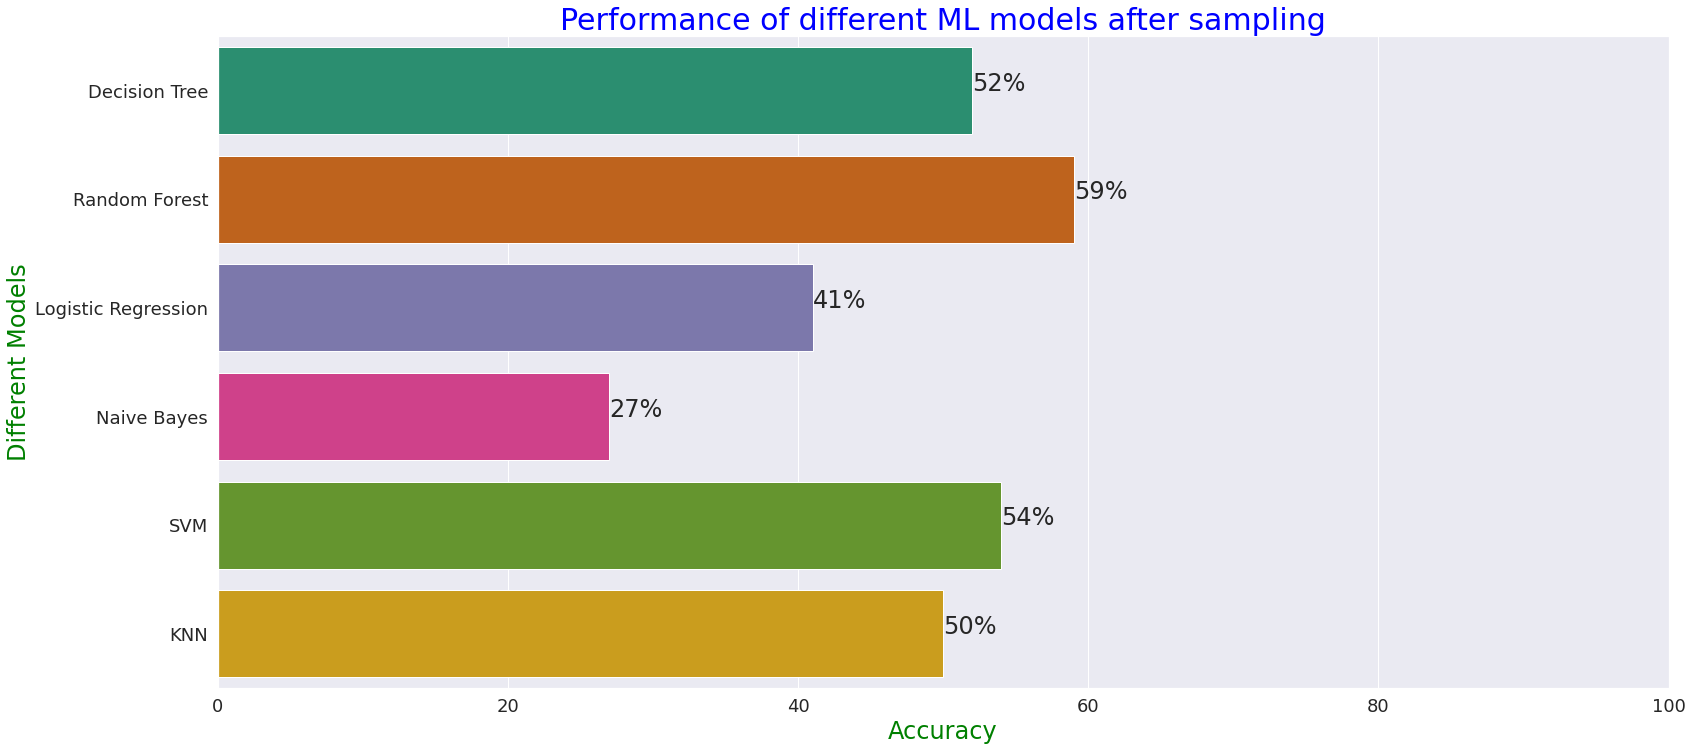

In [80]:
d_ml_a = ['Decision Tree','Random Forest','Logistic Regression','Naive Bayes','SVM','KNN']

d_val_a = [round(acc_dt_af,2)*100,round(acc_rf_af,2)*100,round(acc_lg_af,2)*100,round(acc_nb_af,2)*100,round(acc_svm_af,2)*100,round(acc_knn_af,2)*100]

ser_md_a = pd.Series(d_ml_a,name = 'Models')
ser_v_a = pd.Series(d_val_a,name = 'Accuracy')
df_d_a = pd.merge(ser_md_a,ser_v_a,right_index = True, 
               left_index = True)

fig, ax= plt.subplots(figsize =(26,12))
sns.set_style('darkgrid')
sns.set_context('notebook')
sns.set(font_scale=2)
# plt.fontsize =(35)

ax=sns.barplot(palette="Dark2",ax=ax,
            x='Accuracy', y='Models',data=df_d_a)
total = 100
for p in ax.patches:
    percentage ='{:.0f}%'.format(100 * p.get_width()/total)
    width, height = p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlim(left = 0, right = 100)
plt.title('Performance of different ML models after sampling',
         fontsize = 30,color = 'blue')
plt.xlabel ('Accuracy',fontsize = 24,color = 'green')
plt.ylabel ('Different Models',fontsize = 24,color = 'green')
plt.show ()